<a href="https://colab.research.google.com/github/mark3000-010701/Dataanalyst/blob/main/Th%E1%BB%B1c_H%C3%A0nh_Ti%E1%BB%81n_X%E1%BB%AD_L%C3%AD_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

In [3]:
# định nghĩa khoảng giá trị các nhóm
bins = [18, 25, 35, 60, 100]

In [4]:
# thực hiện rời rạc hóa
cats = pd.cut(ages, bins)

In [5]:
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64, right]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [6]:
# lấy ra index của nhóm tương ứng với các phần tử
cats.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [7]:
# lấy ra các nhóm
cats.categories

IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]], dtype='interval[int64, right]')

In [8]:
# thống kê số lượng phần tử ở mỗi nhóm
pd.value_counts(cats)

(18, 25]     5
(25, 35]     3
(35, 60]     3
(60, 100]    1
dtype: int64

In [9]:
pd.cut(ages, [18, 26, 36, 61, 100], right=False)


[[18, 26), [18, 26), [18, 26), [26, 36), [18, 26), ..., [26, 36), [61, 100), [36, 61), [36, 61), [26, 36)]
Length: 12
Categories (4, interval[int64, left]): [[18, 26) < [26, 36) < [36, 61) < [61, 100)]

In [10]:
# danh sách nhãn
group_names = ['Youth', 'YoungAdult', 'MiddleAged', 'Senior']

pd.cut(ages, bins, labels=group_names)

['Youth', 'Youth', 'Youth', 'YoungAdult', 'Youth', ..., 'YoungAdult', 'Senior', 'MiddleAged', 'MiddleAged', 'YoungAdult']
Length: 12
Categories (4, object): ['Youth' < 'YoungAdult' < 'MiddleAged' < 'Senior']

In [11]:
# sinh dữ liệu ngẫu nhiên gồm 20 phần tử
data = np.random.rand(20)

In [12]:
cut_data = pd.cut(data, 4, precision=2)
cut_data

[(0.47, 0.7], (0.47, 0.7], (0.24, 0.47], (0.0014, 0.24], (0.0014, 0.24], ..., (0.0014, 0.24], (0.47, 0.7], (0.7, 0.94], (0.0014, 0.24], (0.0014, 0.24]]
Length: 20
Categories (4, interval[float64, right]): [(0.0014, 0.24] < (0.24, 0.47] < (0.47, 0.7] < (0.7, 0.94]]

In [13]:
pd.value_counts(cut_data)

(0.0014, 0.24]    8
(0.47, 0.7]       6
(0.24, 0.47]      3
(0.7, 0.94]       3
dtype: int64

In [14]:
 # sinh ngẫu nhiễn 1000 điểm dữ liệu
 data = np.random.randn(1000)

In [15]:
# thực hiện hàm qcut trên dữ liệu vừa sinh ra
cats = pd.qcut(data, 4)

In [16]:
cats

[(-0.016, 0.661], (-3.3289999999999997, -0.66], (-0.66, -0.016], (-0.016, 0.661], (-0.016, 0.661], ..., (-0.66, -0.016], (-0.016, 0.661], (-0.66, -0.016], (-3.3289999999999997, -0.66], (-0.016, 0.661]]
Length: 1000
Categories (4, interval[float64, right]): [(-3.3289999999999997, -0.66] < (-0.66, -0.016] < (-0.016, 0.661] <
                                           (0.661, 2.962]]

In [17]:
#thống kê số lượng phần tử
pd.value_counts(cats)

(-3.3289999999999997, -0.66]    250
(-0.66, -0.016]                 250
(-0.016, 0.661]                 250
(0.661, 2.962]                  250
dtype: int64

In [18]:
pd.qcut(data, [0, 0.1, 0.5, 0.9, 1.])

[(-0.016, 1.291], (-1.297, -0.016], (-1.297, -0.016], (-0.016, 1.291], (-0.016, 1.291], ..., (-1.297, -0.016], (-0.016, 1.291], (-1.297, -0.016], (-3.3289999999999997, -1.297], (-0.016, 1.291]]
Length: 1000
Categories (4, interval[float64, right]): [(-3.3289999999999997, -1.297] < (-1.297, -0.016] < (-0.016, 1.291] <
                                           (1.291, 2.962]]

# **[Thực hành] Thực hành trên bộ dữ liệu FoodPrice_in_Turkey**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

In [3]:
# đọc dữ liệu
df = pd.read_csv("/content/drive/MyDrive/Read_File_In_Python/FoodPrice_in_Turkey.csv", encoding = "ISO-8859-1")

# in ra kich thuoc du lieu
df.shape

(7381, 8)

In [4]:
df.head()

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
0,National Average,52,Rice - Retail,5,KG,5,2013,4.4920
1,National Average,52,Rice - Retail,5,KG,6,2013,4.5786
2,National Average,52,Rice - Retail,5,KG,11,2013,4.7865
3,National Average,52,Rice - Retail,5,KG,12,2013,5.1337
4,National Average,52,Rice - Retail,5,KG,1,2014,5.5099


In [5]:
# mô tả dữ liệu
df.describe()

,ProductId,UmId,Month,Year,Price
count,7381.000000,7381.000000,7381.000000,7381.000000,7381.000000
mean,254.509687,15.252811,6.479881,2017.458474,15.738709
std,141.008599,25.276665,3.530361,1.499256,22.418284
min,52.000000,5.000000,1.000000,2013.000000,0.253900
25%,114.000000,5.000000,3.000000,2017.000000,3.223600
50%,239.000000,5.000000,6.000000,2018.000000,5.909600
75%,388.000000,5.000000,10.000000,2019.000000,20.441900
max,502.000000,102.000000,12.000000,2019.000000,159.445800


In [6]:
# thông tin dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7381 entries, 0 to 7380
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Place        7381 non-null   object 
 1   ProductId    7381 non-null   int64  
 2   ProductName  7381 non-null   object 
 3   UmId         7381 non-null   int64  
 4   UmName       7381 non-null   object 
 5   Month        7381 non-null   int64  
 6   Year         7381 non-null   int64  
 7   Price        7381 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 461.4+ KB


In [7]:
# kiểm tra dữ liệu bị khuyết
df.isna()

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
7376,False,False,False,False,False,False,False,False
7377,False,False,False,False,False,False,False,False
7378,False,False,False,False,False,False,False,False
7379,False,False,False,False,False,False,False,False


In [8]:
# kiểm tra dữ liệu không bị khuyết
df.notna()

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
0,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...
7376,True,True,True,True,True,True,True,True
7377,True,True,True,True,True,True,True,True
7378,True,True,True,True,True,True,True,True
7379,True,True,True,True,True,True,True,True


In [9]:
# xóa những dòng chứa giá trị bị khuyết
df1 = df.dropna()

In [10]:
df1.shape

(7381, 8)

# Xử lý dữ liệu ngoại lai cho đặc trưng PriceIn [ ]:

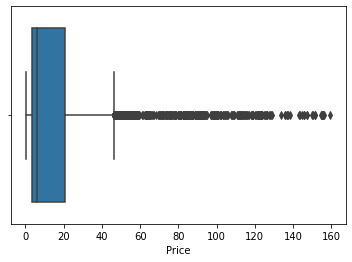

In [11]:
sns.boxplot(x=df1['Price'])  # vẽ box plot cho dữ liệu ở cột Price

In [12]:
# IQR Z-score
Q1 = df1['Price'].quantile(0.25)
Q3 = df1['Price'].quantile(0.75)
IQR = Q3 - Q1

In [13]:
# xác định phần tử không phải ngoại lai
df2 = df1
df2['outlier'] = ~((df1['Price'] < (Q1 - 1.5*IQR)) | (df1['Price'] > (Q3 + 1.5*IQR)))

In [14]:
# xóa phần tử ngoại lai
df2 = df2[df2['outlier'] == True]

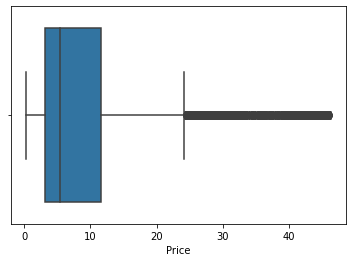

In [15]:
sns.boxplot(x=df2['Price'])  # vẽ box plot cho dữ liệu ở cột Price

In [16]:
# mô tả dữ liệu
df2['Price'].describe()

count    6784.000000
mean       10.503617
std        11.661447
min         0.253900
25%         3.079550
50%         5.373350
75%        11.541925
max        46.251900
Name: Price, dtype: float64

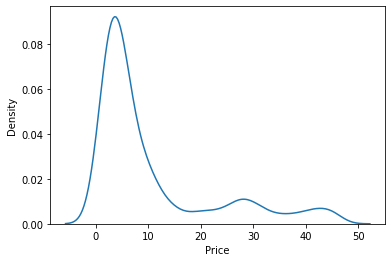

In [17]:
# biểu đồ phân bố dữ liệu
sns.kdeplot(data=df2['Price'])

In [18]:
# chuẩn hóa dữ liệu với minmax scaling
scaler = MinMaxScaler()

# Chuẩn hóa dữ liệu trong df với Min max scaling ở 2 cột Price
df_s = scaler.fit_transform(df2[['Price']])

In [19]:
# mô tả dữ liệu sau chuẩn hóa
pd.DataFrame(df_s).describe()

,0
count,6784.000000
mean,0.222830
std,0.253521
min,0.000000
25%,0.061430
50%,0.111297
75%,0.245403
max,1.000000


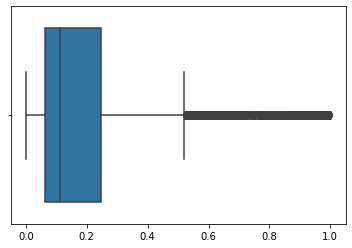

In [20]:
# vẽ lại biểu đồ hộp
sns.boxplot(x=df_s)

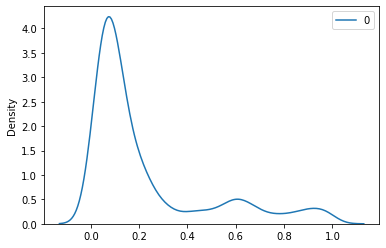

In [21]:
# biểu đồ phân bố dữ liệu
sns.kdeplot(data=df_s)

In [22]:
# chuẩn hóa dữ liệu với robust scaling
scaler = RobustScaler()

# Chuẩn hóa dữ liệu trong df với Robust Scaling ở 2 cột Price
df_s = scaler.fit_transform(df2[['Price']])

In [23]:
# mô tả dữ liệu sau chuẩn hóa
pd.DataFrame(df_s).describe()

,0
count,6.784000e+03
mean,6.062443e-01
std,1.378035e+00
min,-6.049661e-01
25%,-2.710587e-01
50%,-5.247539e-17
75%,7.289413e-01
max,4.830624e+00


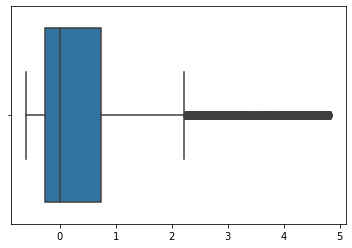

In [24]:
# vẽ lại biểu đồ hộp
sns.boxplot(x=df_s)

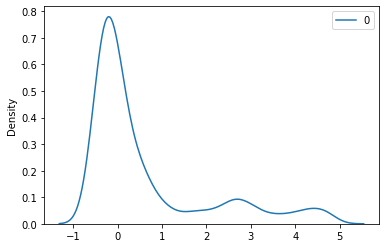

In [25]:
# biểu đồ phân bố dữ liệu
sns.kdeplot(data=df_s)

In [26]:
# chuẩn hóa dữ liệu với z-score scaling
scaler = StandardScaler()

# Chuẩn hóa dữ liệu trong df với StandardScaler ở 2 cột Price
df_s = scaler.fit_transform(df2[['Price']])

In [27]:
# mô tả dữ liệu sau chuẩn hóa
pd.DataFrame(df_s).describe()

,0
count,6.784000e+03
mean,-2.528769e-16
std,1.000074e+00
min,-8.790052e-01
25%,-6.366803e-01
50%,-4.399664e-01
75%,8.904423e-02
max,3.065736e+00


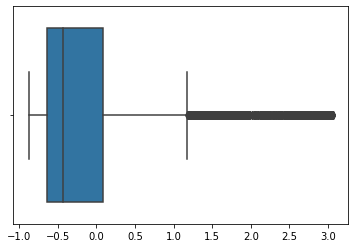

In [28]:
sns.boxplot(x=df_s)

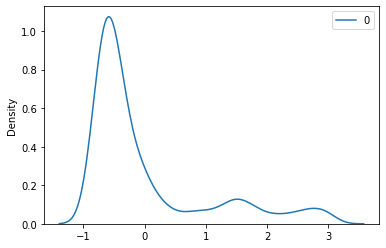

In [29]:
sns.kdeplot(data=df_s)

# Mã hóa dữ liệuIn [ ]:

In [30]:
# các giá trị ở cột ProductName
df2['ProductName'].unique()

array(['Rice - Retail', 'Wheat flour - Retail', 'Beans (white) - Retail',
       'Potatoes - Retail', 'Eggs - Retail', 'Meat (chicken) - Retail',
       'Sugar - Retail', 'Garlic - Retail', 'Lentils - Retail',
       'Pasta - Retail', 'Tomatoes - Retail',
       'Groundnuts (shelled) - Retail', 'Bread (common) - Retail',
       'Coffee - Retail', 'Onions - Retail', 'Tea (green) - Retail',
       'Cabbage - Retail', 'Meat (mutton) - Retail',
       'Oil (sunflower) - Retail', 'Salt - Retail',
       'Coffee (instant) - Retail', 'Peas (green, dry) - Retail',
       'Apples (red) - Retail', 'Cauliflower - Retail',
       'Cucumbers (greenhouse) - Retail', 'Oil (olive) - Retail',
       'Chickpeas - Retail', 'Bananas - Retail', 'Bulgur - Retail',
       'Tea - Retail', 'Fuel (petrol-gasoline) - Retail',
       'Transport (public) - Retail', 'Tomatoes (paste) - Retail',
       'Fuel (gas) - Retail', 'Apples - Retail', 'Oranges - Retail',
       'Yogurt - Retail', 'Bread (pita) - Retail', 'C

In [31]:
# mã hóa cột ProductName với One-hot encoder sử dụng scikit learn
encoder = OneHotEncoder()

encoded_data = encoder.fit_transform(np.asarray(df2['ProductName']).reshape(-1,1))
encoded_data.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [32]:
# mã hóa cột ProductName với One-hot encoder sử dụng pandas
pd.get_dummies(df2['ProductName'])

,Apples (red) - Retail,Apples - Retail,Bananas - Retail,Beans (white) - Retail,Bread (common) - Retail,Bread (pita) - Retail,Bulgur - Retail,Cabbage - Retail,Cauliflower - Retail,Cheese - Retail,...,Tea (herbal) - Retail,Tea - Retail,Tomatoes (paste) - Retail,Tomatoes - Retail,Transport (public) - Retail,"Wage (non-qualified labour, non-agricultural) - Retail",Water - Retail,Wheat flour - Retail,Yogurt - Retail,Zucchini - Retail
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7371,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7372,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
# mã hóa cột ProductName với Label encoder sử dụng scikit learn
encoder = LabelEncoder()

encoded_data = encoder.fit_transform(np.asarray(df2['ProductName']))
encoded_data

array([36, 36, 36, ..., 11, 11, 11])

In [34]:
# mã hóa cột ProductName với Label encoder sử dụng pandas
df2['ProductName'].astype('category').cat.codes

0       36
1       36
2       36
3       36
4       36
        ..
7369    11
7370    11
7371    11
7372    11
7373    11
Length: 6784, dtype: int8

# Rời rạc hóa dữ liệuIn [ ]:

In [35]:
df2.head()

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price,outlier
0,National Average,52,Rice - Retail,5,KG,5,2013,4.4920,True
1,National Average,52,Rice - Retail,5,KG,6,2013,4.5786,True
2,National Average,52,Rice - Retail,5,KG,11,2013,4.7865,True
3,National Average,52,Rice - Retail,5,KG,12,2013,5.1337,True
4,National Average,52,Rice - Retail,5,KG,1,2014,5.5099,True


In [36]:
# Rời rạc hóa dữ liệu ở cột Price

# chia thành 5 khoảng giá trị có độ dài bằng nhau
cats = pd.cut(df2['Price'], 5)
cats

0         (0.208, 9.454]
1         (0.208, 9.454]
2         (0.208, 9.454]
3         (0.208, 9.454]
4         (0.208, 9.454]
              ...       
7369    (37.052, 46.252]
7370    (37.052, 46.252]
7371    (37.052, 46.252]
7372    (37.052, 46.252]
7373    (37.052, 46.252]
Name: Price, Length: 6784, dtype: category
Categories (5, interval[float64, right]): [(0.208, 9.454] < (9.454, 18.653] < (18.653, 27.853] <
                                           (27.853, 37.052] < (37.052, 46.252]]

In [37]:
# số lượng phần từ ở mỗi phần
pd.value_counts(cats)

(0.208, 9.454]      4711
(9.454, 18.653]      743
(18.653, 27.853]     474
(27.853, 37.052]     449
(37.052, 46.252]     407
Name: Price, dtype: int64

In [38]:
# chia thành 5 phần có số lượng phần tử tương đương nhau
cats = pd.qcut(df2['Price'], 5)
cats

0          (4.315, 6.81]
1          (4.315, 6.81]
2          (4.315, 6.81]
3          (4.315, 6.81]
4          (4.315, 6.81]
              ...       
7369    (17.637, 46.252]
7370    (17.637, 46.252]
7371    (17.637, 46.252]
7372    (17.637, 46.252]
7373    (17.637, 46.252]
Name: Price, Length: 6784, dtype: category
Categories (5, interval[float64, right]): [(0.253, 2.694] < (2.694, 4.315] < (4.315, 6.81] <
                                           (6.81, 17.637] < (17.637, 46.252]]

In [39]:
# số lượng phần từ ở mỗi phần
pd.value_counts(cats)

(0.253, 2.694]      1358
(4.315, 6.81]       1357
(17.637, 46.252]    1357
(2.694, 4.315]      1356
(6.81, 17.637]      1356
Name: Price, dtype: int64

# **[Thực hành] Thực hành trên bộ dữ liệu Online Retail**

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

In [45]:
# đọc dữ liệu
df = pd.read_csv("https://s3.ap-southeast-1.amazonaws.com/learn.codegym.vn/media/public/2021/12/31011319/OnlineRetail.csv", encoding = "ISO-8859-1")

# in ra kich thuoc du lieu
df.shape

(541909, 8)

In [46]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [49]:
df.isna()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
541904,False,False,False,False,False,False,False,False
541905,False,False,False,False,False,False,False,False
541906,False,False,False,False,False,False,False,False
541907,False,False,False,False,False,False,False,False


In [50]:
# kiểm tra dữ liệu không bị khuyết
df['CustomerID'].notna()

0         True
1         True
2         True
3         True
4         True
          ... 
541904    True
541905    True
541906    True
541907    True
541908    True
Name: CustomerID, Length: 541909, dtype: bool

In [51]:
# in những dòng ngoại lai Quantity < 0
df[df['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [52]:
#Xóa bỏ dòng ngoại lai của Quantity
df = df[df['Quantity'] >= 0]

In [53]:
# xóa những dòng chứa giá trị bị khuyết
df1 = df.dropna()

In [54]:
df1.shape

(397924, 8)

In [55]:
# xóa những dòng chứa toàn giá trị khuyết
df2 = df.dropna(how='all')

In [56]:
df2.shape

(531285, 8)

In [57]:
# giữ những dòng có ít nhất 7 giá trị không bị khuyết
df3 = df.dropna(thresh=7)

In [58]:
df3.shape

(530693, 8)

In [59]:
# xóa những hàng mà có giá trị bị khuyết trên cột CustomerID
df4 = df.dropna(subset=["CustomerID"])

In [60]:
df4.shape

(397924, 8)

# Thay thế dữ liệu bị khuyết

In [61]:
# thay thế những giá trị bị khuyết trên cột CustomerID bằng giá trị -1
df5 = df
df5['CustomerID'] = df['CustomerID'].fillna(-1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [62]:
# hiển thị những dòng có CustomerID = -1 vừa được thay thế
df5[df5['CustomerID'] == -1]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,-1.0,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,-1.0,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,-1.0,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,-1.0,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,-1.0,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,-1.0,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,-1.0,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,-1.0,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,-1.0,United Kingdom


In [63]:
# thay thế các giá trị bị khuyết ở cột Country bằng giá trị trước nó
df5['Country'] = df['Country'].fillna(method='ffill')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [64]:
df5

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


# **Xử lý dữ liệu ngoại lai**

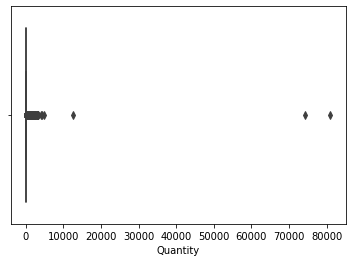

In [65]:
sns.boxplot(x=df1['Quantity'])  # vẽ box plot cho dữ liệu ở cột Quantity

In [66]:
Q1 = df1['Quantity'].quantile(0.25)
Q3 = df1['Quantity'].quantile(0.75)
IQR = Q3 - Q1

In [67]:
# xác định phần tử không phải ngoại lai
df6 = df1
df6['outlier'] = ~((df1['Quantity'] < (Q1 - 1.5*IQR)) | (df1['Quantity'] > (Q3 + 1.5*IQR)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [68]:
# xóa phần tử ngoại lai
df6 = df6[df6['outlier'] == True]

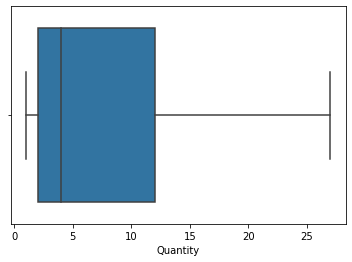

In [69]:
sns.boxplot(x=df6['Quantity'])  # vẽ box plot cho dữ liệu ở cột Quantity

# Chuẩn hóa dữ liệu 

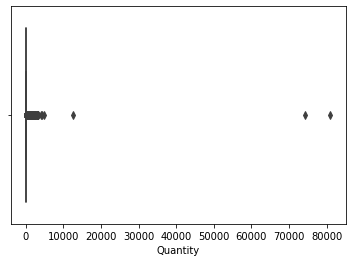

In [70]:
# vẽ biểu đồ hộp cho cột Quantity
sns.boxplot(x=df1['Quantity'])

In [71]:
# mô tả dữ liệu
df1['Quantity'].describe()

count    397924.000000
mean         13.021823
std         180.420210
min           1.000000
25%           2.000000
50%           6.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

In [72]:
# chuẩn hóa dữ liệu với minmax scaling
scaler = MinMaxScaler()

# Chuẩn hóa dữ liệu trong df với MinMaxScaler ở 2 cột Quantity và UnitPrice
df_s = scaler.fit_transform(df1[['Quantity']])

In [73]:
# mô tả dữ liệu sau chuẩn hóa
pd.DataFrame(df_s).describe()

,0
count,397924.000000
mean,0.000148
std,0.002228
min,0.000000
25%,0.000012
50%,0.000062
75%,0.000136
max,1.000000


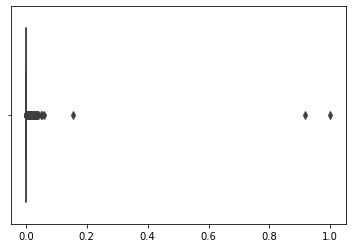

In [74]:
# vẽ lại biểu đồ hộp
sns.boxplot(x=df_s)

In [75]:
# chuẩn hóa dữ liệu với robust scaling
scaler = RobustScaler()

# Chuẩn hóa dữ liệu trong df với RobustScaler ở 2 cột Quantity và UnitPrice
df_s = scaler.fit_transform(df1[['Quantity']])

In [76]:
# mô tả dữ liệu sau chuẩn hóa
pd.DataFrame(df_s).describe()

,0
count,397924.000000
mean,0.702182
std,18.042021
min,-0.500000
25%,-0.400000
50%,0.000000
75%,0.600000
max,8098.900000


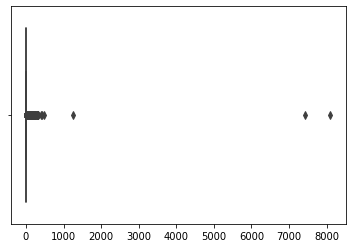

In [77]:
# vẽ lại biểu đồ hộp
sns.boxplot(x=df_s)

In [78]:
# chuẩn hóa dữ liệu với z-score scaling
scaler = StandardScaler()

# Chuẩn hóa dữ liệu trong df với StandardScaler ở 2 cột Quantity và UnitPrice
df_s = scaler.fit_transform(df1[['Quantity']])

In [79]:
# mô tả dữ liệu sau chuẩn hóa
pd.DataFrame(df_s).describe()

,0
count,3.979240e+05
mean,-2.294255e-15
std,1.000001e+00
min,-6.663244e-02
25%,-6.108981e-02
50%,-3.891932e-02
75%,-5.663581e-03
max,4.488526e+02


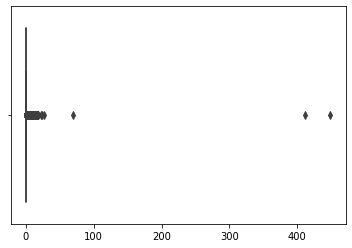

In [80]:
sns.boxplot(x=df_s)

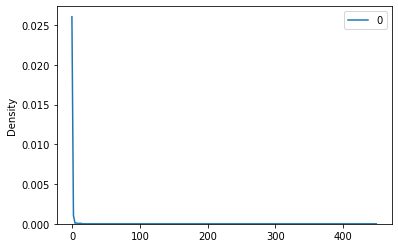

In [81]:
sns.kdeplot(data=df_s)

# Mã hóa dữ liệu

In [82]:
# các giá trị ở cột Country
df1['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community',
       'Bahrain', 'Malta', 'RSA'], dtype=object)

In [83]:
# mã hóa cột Country với One-hot encoder sử dụng scikit learn
encoder = OneHotEncoder()

encoded_data = encoder.fit_transform(np.asarray(df1['Country']).reshape(-1,1))
encoded_data.todense()

matrix([[0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [84]:
# mã hóa cột Country với One-hot encoder sử dụng pandas
pd.get_dummies(df1['Country'])

,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,Czech Republic,Denmark,...,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom,Unspecified
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
541905,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
541906,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
541907,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
# mã hóa cột Country với Label encoder sử dụng scikit learn
encoder = LabelEncoder()

encoded_data = encoder.fit_transform(np.asarray(df1['Country']))
encoded_data

array([35, 35, 35, ..., 13, 13, 13])

In [86]:
# mã hóa cột Country với Label encoder sử dụng pandas
df1['Country'].astype('category').cat.codes

0         35
1         35
2         35
3         35
4         35
          ..
541904    13
541905    13
541906    13
541907    13
541908    13
Length: 397924, dtype: int8

# Rời rạc hóa dữ liệu

In [87]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,outlier
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,True
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,True
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,True
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,True
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,True


In [88]:
# Rời rạc hóa dữ liệu ở cột UnitPrice

# chia thành 4 khoảng giá trị có độ dài bằng nhau
cats = pd.cut(df1['UnitPrice'], 4)
cats

0         (-8.143, 2035.688]
1         (-8.143, 2035.688]
2         (-8.143, 2035.688]
3         (-8.143, 2035.688]
4         (-8.143, 2035.688]
                 ...        
541904    (-8.143, 2035.688]
541905    (-8.143, 2035.688]
541906    (-8.143, 2035.688]
541907    (-8.143, 2035.688]
541908    (-8.143, 2035.688]
Name: UnitPrice, Length: 397924, dtype: category
Categories (4, interval[float64, right]): [(-8.143, 2035.688] < (2035.688, 4071.375] <
                                           (4071.375, 6107.062] < (6107.062, 8142.75]]

In [89]:
# số lượng phần từ ở mỗi phần
pd.value_counts(cats)

(-8.143, 2035.688]      397915
(2035.688, 4071.375]         6
(4071.375, 6107.062]         2
(6107.062, 8142.75]          1
Name: UnitPrice, dtype: int64

In [90]:
# chia thành 4 phần có số lượng phần tử tương đương nhau
cats = pd.qcut(df1['UnitPrice'], 4)
cats

0            (1.95, 3.75]
1            (1.95, 3.75]
2            (1.95, 3.75]
3            (1.95, 3.75]
4            (1.95, 3.75]
               ...       
541904     (-0.001, 1.25]
541905       (1.95, 3.75]
541906    (3.75, 8142.75]
541907    (3.75, 8142.75]
541908    (3.75, 8142.75]
Name: UnitPrice, Length: 397924, dtype: category
Categories (4, interval[float64, right]): [(-0.001, 1.25] < (1.25, 1.95] < (1.95, 3.75] <
                                           (3.75, 8142.75]]

In [91]:
# số lượng phần từ ở mỗi phần
pd.value_counts(cats)

(-0.001, 1.25]     140759
(1.95, 3.75]       100658
(3.75, 8142.75]     86446
(1.25, 1.95]        70061
Name: UnitPrice, dtype: int64